In [2]:
import glob
import re
FILENAME_REGEX = '\.\/scraped\/statuses-([\d\-]+).json'
file_matches = [re.match(FILENAME_REGEX, file) for file in glob.glob("./scraped/statuses-*.json")]
files = [(m[1], m[0]) for m in file_matches]

In [116]:
import json

def parse_date(date):
    if not date:
        return None
    
    date = date.replace("+", "")
    try:
        return time.strptime(date, "%m/%d/%Y")
    except:
        None
        
def release_dates_by_sid(file):
    sids = {}
    with open(file) as f:
        for line in f:
            l = json.loads(line)
            sids[l['sid']] = parse_date(l.get('earliest_release_date', None))
    return sids

In [117]:
dates = {}

for (date, file) in files:
    print(date)
    dates[date] = release_dates_by_sid(file)

2017-03-24
2017-03-30
2017-04-07
2017-04-14
2017-04-24
2017-05-02
2017-05-15
2017-05-22


In [119]:
num_release_dates_by_sid = {}

for date, release_dates in dates.items():
    for sid, release_date in release_dates.items():
        num_release_dates_by_sid[sid] = num_release_dates_by_sid.get(sid, 0)
        
        if release_date is not None:
            num_release_dates_by_sid[sid] += 1

[(0, 1301), (1, 250), (2, 285), (3, 1214), (4, 1962), (5, 1324), (6, 253), (7, 4728), (8, 2932)]


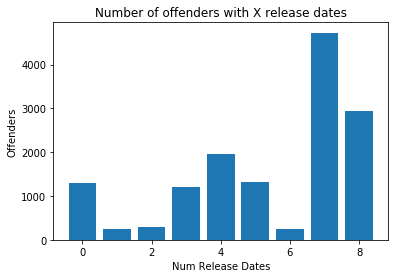

In [152]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

counts = [(sid, num) for sid, num in num_release_dates_by_sid.items()]
max_count = max(map(lambda i: i[1], counts))
num_per_count = [(c, len(list(filter(lambda v: v[1] == c, counts)))) for c in range(0, max_count + 1)]

# prints tuples like (N, C): C offenders have N parsable release dates
print(num_per_count)

x = list(map(lambda i: i[0], num_per_count))
y = list(map(lambda i: i[1], num_per_count))
plt.bar(x, y)
plt.title("Number of offenders with X release dates")
plt.xlabel("Num Release Dates")
plt.ylabel("Offenders")
plt.show()